In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset (note: lines=True for JSON lines format)
df = pd.read_json("News_Category_Dataset_v3.json", lines=True)

# Display first 5 rows
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
# Keep only 'headline' and 'category'
df = df[['headline', 'category']]

# Remove rows with missing values
df.dropna(inplace=True)

# Show basic info after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [4]:
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode text categories into numbers
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Show first 5 rows with encoded labels
df.head()


,headline,category,category_encoded
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,35
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,35
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,5
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,22
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,35


In [6]:
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = df['headline']
y = df['category_encoded']

# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 167621
Testing samples: 41906


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


C:\Users\HHC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


Accuracy: 0.5547415644537775
              precision    recall  f1-score   support

           0       0.40      0.17      0.24       293
           1       0.29      0.09      0.13       275
           2       0.46      0.30      0.36       889
           3       0.46      0.40      0.42      1216
           4       0.43      0.30      0.35       202
           5       0.56      0.39      0.46      1022
           6       0.51      0.49      0.50       713
           7       0.72      0.21      0.33       202
           8       0.77      0.62      0.69       664
           9       0.46      0.22      0.30       209
          10       0.53      0.71      0.61      3419
          11       0.70      0.19      0.29       313
          12       0.41      0.08      0.14       263
          13       0.60      0.66      0.63      1270
          14       0.44      0.14      0.21       270
          15       0.34      0.25      0.29       532
          16       0.30      0.13      0.18      130

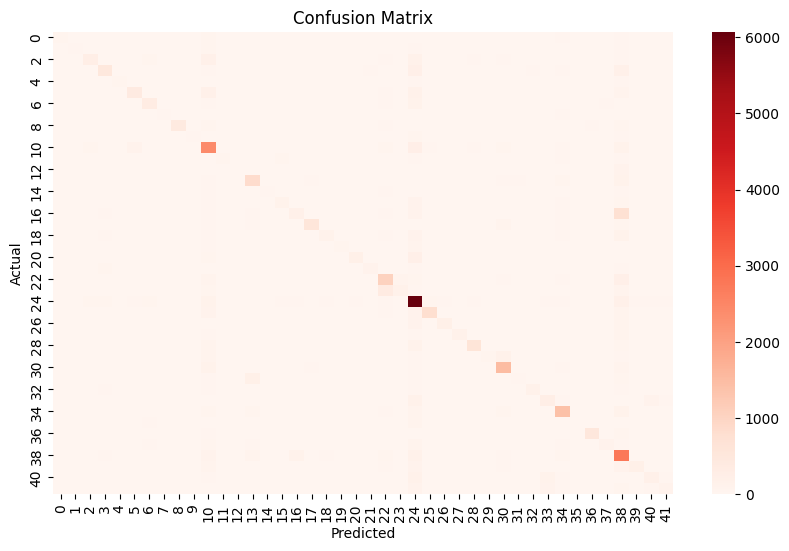

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(df['headline'])  # Replace 'headline' if your column name is different


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

clusters = kmeans.labels_
print("Cluster labels assigned to headlines:", clusters[:20])  # First 20 cluster labels


Cluster labels assigned to headlines: [4 0 4 4 4 4 4 4 9 4 4 4 4 4 4 4 4 4 4 4]
